Epoch 1, RMSE: 73159.26941480275
Epoch 2, RMSE: 41458.55412266961
Epoch 3, RMSE: 28465.85103813096
Epoch 4, RMSE: 24148.348108957216
Epoch 5, RMSE: 22942.17501292995
Epoch 6, RMSE: 22630.540153250935
Epoch 7, RMSE: 22551.946254764596
Epoch 8, RMSE: 22532.251849549826
Epoch 9, RMSE: 22527.324780916802
Epoch 10, RMSE: 22526.092650383078


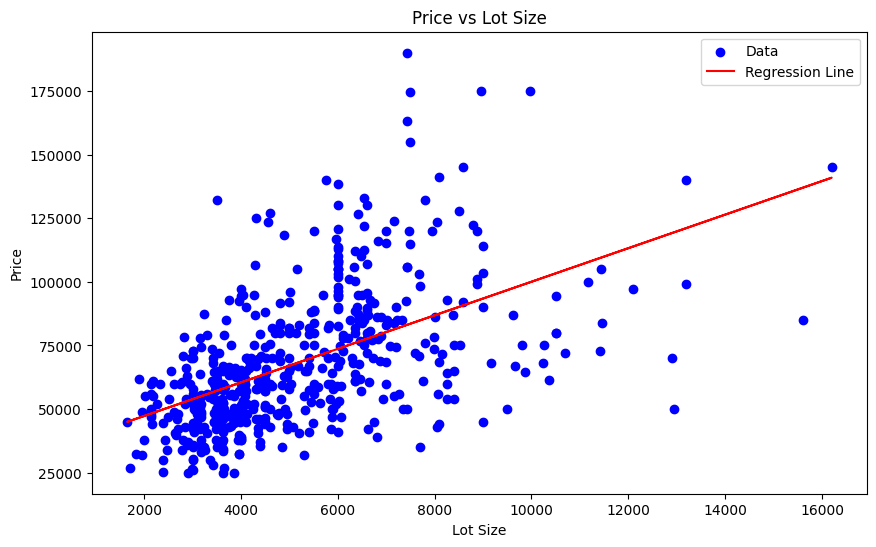

/var/folders/vc/kpwvn_g914n06xqf9q_m7vxr0000gn/T/ipykernel_2928/4277325182.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


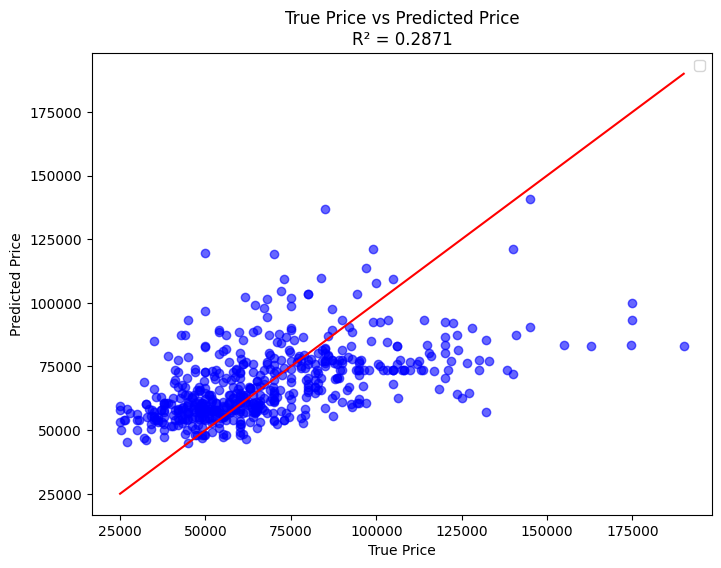

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')

price = data['price'].copy()
lotsize = data['lotsize'].copy()

lotsizeMean = data['lotsize'].mean()
lotsizeSTD = data['lotsize'].std()
data['lotsize'] = (data['lotsize'] - lotsizeMean) / lotsizeSTD

x = data[['lotsize']]
y = data['price']

x.insert(0, 'Intercept', 1)

zeroMatrix = np.zeros(x.shape[1])

alpha = 0.5
rmse_list = []

for epoch in range(10):
    predictedY = x @ zeroMatrix
    error = predictedY - y

    rmse = np.sqrt(np.mean(error ** 2))
    rmse_list.append(rmse)

    print(f'Epoch {epoch+1}, RMSE: {rmse}')

    gradient = (1/len(y)) * (x.T @ error)
    zeroMatrix = zeroMatrix - alpha * gradient

lotsizeNormalized = (lotsize - lotsizeMean) / lotsizeSTD
predictedX = np.column_stack((np.ones(len(y)), lotsizeNormalized))
predictedY = predictedX @ zeroMatrix

plt.figure(figsize=(10, 6))
plt.scatter(lotsize, price, color='blue', label="Data")
plt.plot(lotsize, predictedY, color='red', label="Regression Line")
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size')
plt.legend()
plt.show()

rSquared = 1 - (np.sum((y - predictedY) ** 2) / np.sum((y - np.mean(y)) ** 2))

plt.figure(figsize=(8, 6))
plt.scatter(y, predictedY, color = 'blue', alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price\nR² = {rSquared:.4f}')
plt.legend()
plt.show()

Epoch 1, RMSE: 73159.26941480275
Epoch 2, RMSE: 43332.67885384385
Epoch 3, RMSE: 28241.616853034415
Epoch 4, RMSE: 21427.061669940358
Epoch 5, RMSE: 18740.89647915509
Epoch 6, RMSE: 17760.05782023695
Epoch 7, RMSE: 17389.320164930978
Epoch 8, RMSE: 17224.655889323687
Epoch 9, RMSE: 17130.241099144794
Epoch 10, RMSE: 17061.48354476445
R-squared: 0.6446027883109028


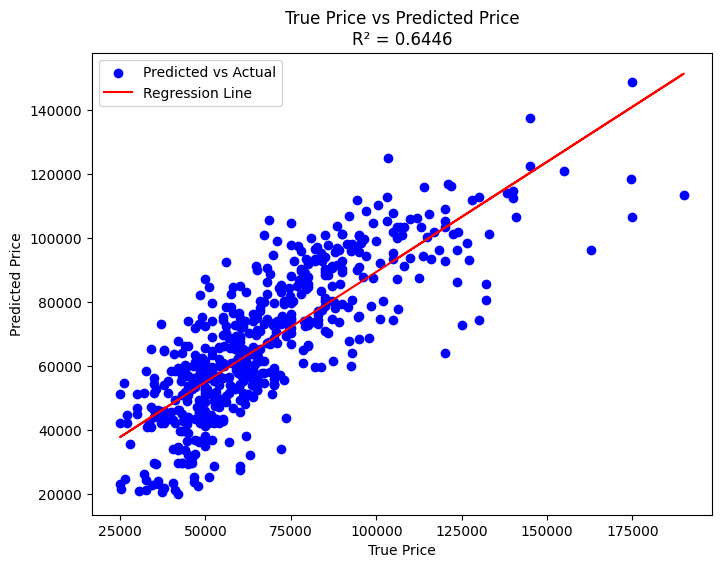

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('housing.csv')
categoricalVals = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
for col in categoricalVals:
    data[col] = data[col].map({'yes': 1, 'no': 0})

features = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
for col in features:
    mean = data[col].mean()
    std = data[col].std()
    data[col] = (data[col] - mean) / std
    
features = features + categoricalVals
x = data[features]
x.insert(0, 'Intercept', 1)

y = data['price']
zeroMatrix = np.zeros(x.shape[1])
alpha = 0.1

iter = 0
for epoch in range(50):
    predictedY = x @ zeroMatrix
    error = predictedY - y
    cost = (1 / len(y)) * (error.T @ error)
    rmse = np.sqrt(np.mean(error ** 2))
    if iter < 10:
        print(f'Epoch {epoch+1}, RMSE: {rmse}')
        iter += 1
    gradient = (2 / len(y)) * (x.T @ error)
    zeroMatrix = zeroMatrix - alpha * gradient

predictedY = x @ zeroMatrix

rSquared = 1 - (np.sum((y - predictedY) ** 2) / np.sum((y - np.mean(y)) ** 2))

print(f'R-squared: {rSquared}')
plt.figure(figsize=(8, 6))
plt.scatter(y, predictedY, color = 'blue', label = 'Predicted vs Actual')
coefficients = np.polyfit(y, predictedY, 1)
plt.plot(y, np.poly1d(coefficients)(y), color = 'red', label = 'Regression Line')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price\nR² = {rSquared:.4f}')
plt.legend()
plt.show()

In [276]:
import numpy as np
import pandas as pd

trainingData = pd.read_csv('heart_disease_train.csv')
testData = pd.read_csv('heart_disease_test.csv')

trainingData.fillna(trainingData.mean(), inplace=True)
testData.fillna(trainingData.mean(), inplace=True)

xTraining = trainingData.drop('TenYearCHD', axis=1)
yTraining = trainingData['TenYearCHD']

xTest = testData.drop('TenYearCHD', axis=1)
yTest = testData['TenYearCHD']

xTraining = (xTraining - xTraining.mean()) / xTraining.std()
xTest = (xTest - xTraining.mean()) / xTraining.std()

xTraining.insert(0, 'Intercept', 1)
xTest.insert(0, 'Intercept', 1)

m, n = xTraining.shape
zeroMatrix = np.zeros(n)
alpha = 0.01

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for epoch in range(10):
    z = xTraining @ zeroMatrix
    cost = - (1 / m) * np.sum(yTraining * np.log(sigmoid(z)) + (1 - yTraining) * np.log(1 - sigmoid(z)))
    print(f'Epoch {epoch + 1}, Cost: {cost}')
    gradient = (1 / m) * (xTraining.T @ (sigmoid(z) - yTraining))
    zeroMatrix = zeroMatrix - alpha * gradient

predictedYTraining = (sigmoid(xTraining @ zeroMatrix) >= 0.5).astype(int)
predictedYTest = (sigmoid(xTest @ zeroMatrix) >= 0.5).astype(int)

truePosTraining = np.sum((yTraining == 1) & (predictedYTraining == 1))
trueNegTraining = np.sum((yTraining == 0) & (predictedYTraining == 0))
falsePosTraining = np.sum((yTraining == 0) & (predictedYTraining == 1))
falseNegTraining = np.sum((yTraining == 1) & (predictedYTraining == 0))

trainingAccuracy = (truePosTraining + trueNegTraining) / (truePosTraining + trueNegTraining + falsePosTraining + falseNegTraining)
trainingPrecision = truePosTraining / (truePosTraining + falsePosTraining)
trainingRecall = truePosTraining / (truePosTraining + falseNegTraining)

print('Training Data Metrics:')
print('Confusion Matrix:')
print(f'[[{trueNegTraining} {falsePosTraining}]\n [{falseNegTraining} {trueNegTraining}]]')
print(f'Accuracy: {trainingAccuracy}')
print(f'Precision: {trainingPrecision}')
print(f'Recall: {trainingRecall}')

truePosTest = np.sum((yTest == 1) & (predictedYTest == 1))
trueNegTest = np.sum((yTest == 0) & (predictedYTest == 0))
falsePosTest = np.sum((yTest == 0) & (predictedYTest == 1))
falseNegTest = np.sum((yTest == 1) & (predictedYTest == 0))

testAccuracy = (truePosTest + trueNegTest) / (truePosTest + trueNegTest + falsePosTest + falseNegTest)
testPrecision = truePosTest / (truePosTest + falsePosTest)
testRecall = truePosTest / (truePosTest + falseNegTest)

print('Test Data Metrics:')
print('Confusion Matrix:')
print(f'[[{trueNegTest} {falsePosTest}]\n [{falseNegTest} {truePosTest}]]')
print(f'Accuracy: {testAccuracy}')
print(f'Precision: {testPrecision}')
print(f'Recall: {testRecall}')

Epoch 1, Cost: 0.6931471805599453
Epoch 2, Cost: 0.6916874881996388
Epoch 3, Cost: 0.6902371595560916
Epoch 4, Cost: 0.6887961157015599
Epoch 5, Cost: 0.6873642784580221
Epoch 6, Cost: 0.6859415703921813
Epoch 7, Cost: 0.6845279148103872
Epoch 8, Cost: 0.6831232357534903
Epoch 9, Cost: 0.6817274579916263
Epoch 10, Cost: 0.6803405070189401
Training Data Metrics:
Confusion Matrix:
[[2670 204]
 [395 2670]]
Accuracy: 0.8233038348082596
Precision: 0.3723076923076923
Recall: 0.23449612403100775
Test Data Metrics:
Confusion Matrix:
[[0 720]
 [0 128]]
Accuracy: 0.1509433962264151
Precision: 0.1509433962264151
Recall: 1.0
